In [1]:
from ExcitonBSEKeldysh import ExcitonMoS2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.sparse.linalg import eigsh
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rc('axes',edgecolor='white')

In [13]:
N=[18,24,30,36,42,48,54,60]
P_T=[];E_T=[]
P_H=[];E_H=[]
for n in N:
    Exciton=ExcitonMoS2(epsilon=2.5,N=n,vb=[6],cb=[7],spin_orbit=False,cutoff=0.6,shift=0.7)
    Exciton.constructTrionBasis()
    Exciton.constructTrionHamiltonian()
    Exciton.constuctExcitonHamiltonian()
    
    ET,DT=eigsh(Exciton.HT,which='SA',k=10)
    EH,DH=eigsh(Exciton.HH,which='SA',k=10)
    
    P=np.zeros(Exciton.NT,dtype=complex)
    for i in range(Exciton.NT):
        i1,i2,j=Exciton.trion_indexes[i]
        x1,y1,c1=Exciton.conduction_states[i1]
        x2,y2,c2=Exciton.conduction_states[i2]
        xv,yv,v=Exciton.valence_states[j]
        if x1==Exciton.trion_q[0] and y1==Exciton.trion_q[1]:
            if x2==xv and y2==yv:
                P[i]+=(Exciton.d[x2,y2,c2,v])
        if x2==Exciton.trion_q[0] and y2==Exciton.trion_q[1]:
            if x1==xv and y1==yv:
                P[i]-=(Exciton.d[x1,y1,c1,v])
    P=np.linalg.norm(P)            
    P_T.append(np.abs(np.sum(DT[:,0].conj()*P))**2)
    E_T.append(ET[0]-Exciton.trion_spectrum_shift)
    
    P=np.array([Exciton.d[indx] for indx in Exciton.indexes])
    P=np.linalg.norm(P) 
    P_H.append(np.abs(np.sum(DH[:,0].conj()*P))**2)
    E_H.append(EH[0])
    
    print(n)

18
24
30
36
42
48
54
60


In [14]:
E_H=np.array(E_H);E_T=np.array(E_T)
P_H=np.array(P_H);P_T=np.array(P_T)

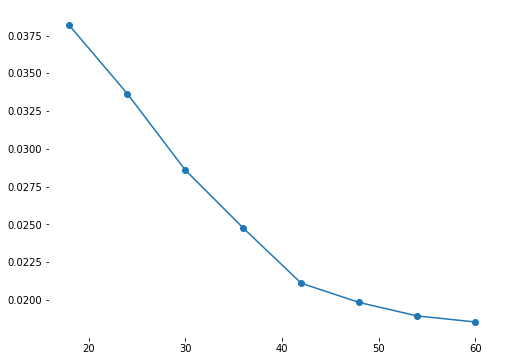

In [15]:
plt.figure(figsize=(8,6))
plt.plot(N,E_H-E_T,'-o')

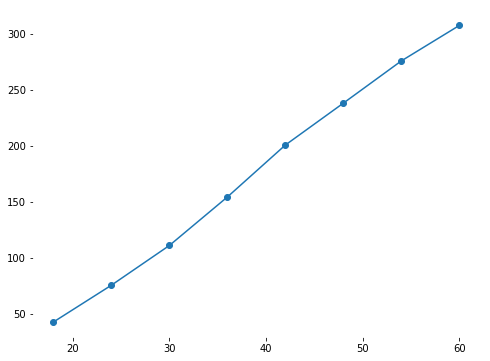

In [18]:
plt.figure(figsize=(8,6))
plt.plot(N,P_T,'-o')

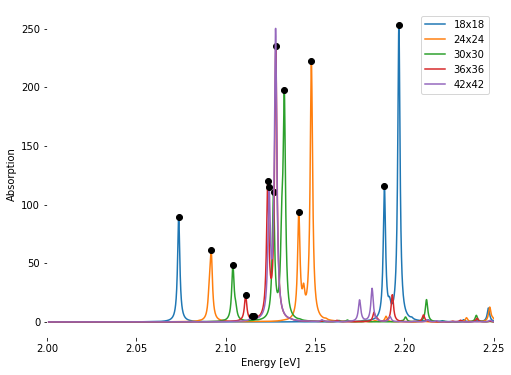

In [173]:
plt.figure(figsize=(8,6))
for i in range(len(N)):
    plt.plot(omega_trion[i],spectrum_trion[i],label='{0}x{0}'.format(N[i]))
    plt.plot(peaks[i][:3],props[i]['peak_heights'][:3],'o',color='black')
plt.xlim([2.0,2.25])
plt.legend(loc='best')
plt.xlabel('Energy [eV]')
plt.ylabel('Absorption')
# plt.yticks([])
plt.savefig('Trion-doping.png',dpi=600)

In [174]:
trion_energy=[(peak[1]+peak[2])/2-peak[0] for peak in peaks]
trion_force=[prop['peak_heights'][0] for prop in props]

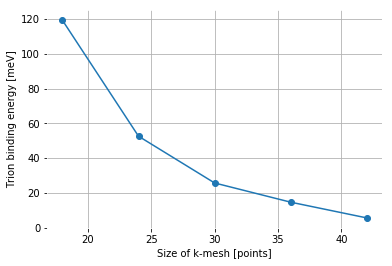

In [175]:
plt.plot(np.array(N),np.array(trion_energy)*1e3,'-o')
plt.xlabel('Size of k-mesh [points]')
plt.ylabel('Trion binding energy [meV]')
plt.grid()
plt.savefig('Trion_binding_energy.png',dpi=600)

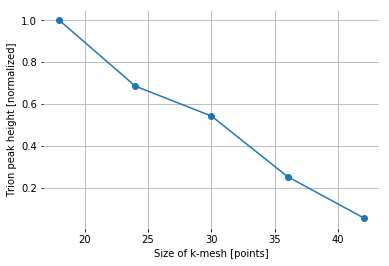

In [176]:
plt.plot(np.array(N),trion_force/np.max(trion_force),'-o')
plt.xlabel('Size of k-mesh [points]')
plt.ylabel('Trion peak height [normalized]')
plt.grid()
plt.savefig('Trion_peak_height.png',dpi=600)

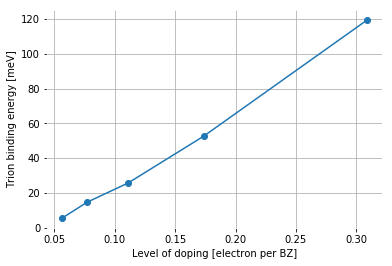

In [177]:
plt.plot(100/np.array(N)**2,np.array(trion_energy)*1e3,'-o')
plt.xlabel('Level of doping [electron per BZ]')
plt.ylabel('Trion binding energy [meV]')
plt.grid()
plt.savefig('Trion_binding_energy_doping.png',dpi=600)

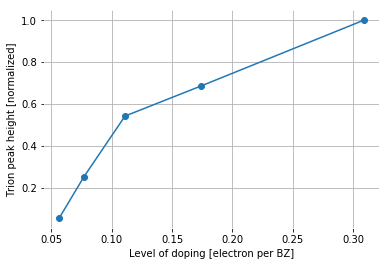

In [178]:
plt.plot(100/np.array(N)**2,trion_force/np.max(trion_force),'-o')
plt.xlabel('Level of doping [electron per BZ]')
plt.ylabel('Trion peak height [normalized]')
plt.grid()
plt.savefig('Trion_peak_height_doping.png',dpi=600)